<a href="https://colab.research.google.com/github/VincentNFR/openclassrooms_p06/blob/main/analyse_exploratoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse exploratoire du dataset

### Import du dataset

In [1]:
%pip install -r requirements.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds


dataset_name = "stanford_dogs"
dataset, info = tfds.load(name=dataset_name, with_info=True)

### Visualisation des données importées

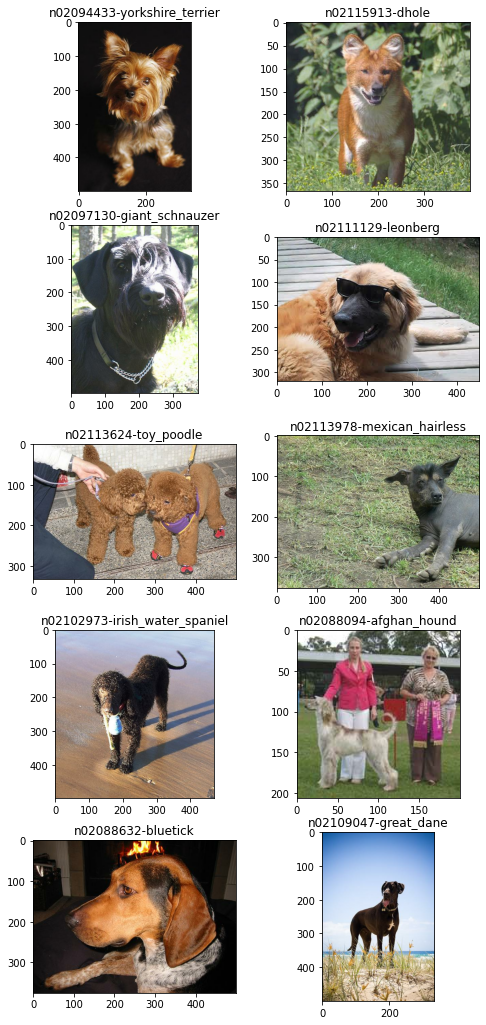

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
get_dog_name = info.features['label'].int2str

plt.figure(figsize=(8,18), facecolor='white')
for idx, dog in enumerate(dataset['train'].take(10)):
    plt.subplot(5, 2, idx+1) #idx start at 1
    plt.imshow(dog['image'])
    plt.title(get_dog_name(dog['label']))
plt.show()

In [5]:
print(f"Nombre d'image dans le train set : {len(dataset['train'])}")
print(f"Nombre d'image dans le test set :{len(dataset['test'])}")

Nombre d'image dans le train set : 12000
Nombre d'image dans le test set :8580


### Etude des propriétés des images

In [6]:
df = pd.concat([tfds.as_dataframe(dataset['train'], info), tfds.as_dataframe(dataset['test'], info)], axis=0)
dataset=None

In [7]:
df.head(5)

,image,image/filename,label,objects/bbox
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",b'Images/n02094433-Yorkshire_terrier/n02094433...,36,"[[0.044, 0.2102102, 0.972, 0.960961]]"
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",b'Images/n02115913-dhole/n02115913_3998.jpg',118,"[[0.07084469, 0.28, 0.98092645, 0.6975]]"
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",b'Images/n02097130-giant_schnauzer/n02097130_2...,46,"[[0.062, 0.0, 0.996, 0.96533334]]"
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",b'Images/n02111129-Leonberg/n02111129_2072.jpg',103,"[[0.18068536, 0.0044444446, 0.99688476, 0.9488..."
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",b'Images/n02113624-toy_poodle/n02113624_4349.jpg',113,"[[0.003003003, 0.206, 0.9069069, 0.566], [0.14..."


In [8]:
df.drop(columns=['image/filename', 'objects/bbox'], inplace=True)
df.columns

Index(['image', 'label'], dtype='object')

In [9]:
df['widths'] = df['image'].apply(lambda x: x.shape[1])
df['heights'] = df['image'].apply(lambda x: x.shape[0])
df.head(5)

,image,label,widths,heights
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",36,333,500
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",118,400,367
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",46,375,500
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",103,450,321
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",113,500,333


In [10]:
labels = df.label.value_counts(ascending=False).reset_index(name='count')
labels['breed'] = labels['index'].apply(lambda x: ' '.join(get_dog_name(x).split('-')[1:]))
labels.head(15)

,index,count,breed
0,2,252,maltese_dog
1,9,239,afghan_hound
2,26,232,scottish_deerhound
3,107,219,pomeranian
4,106,218,samoyed
5,19,218,irish_wolfhound
6,88,218,bernese_mountain_dog
7,4,214,shih tzu
8,105,213,great_pyrenees
9,103,210,leonberg


In [11]:
labels['count'].describe()

count    120.000000
mean     171.500000
std       23.220898
min      148.000000
25%      152.750000
50%      159.500000
75%      186.250000
max      252.000000
Name: count, dtype: float64

Il y a 120 espèce de chien dans le dataset.
La race la plus présente a 252 photos et la race la moins présente en a 148.

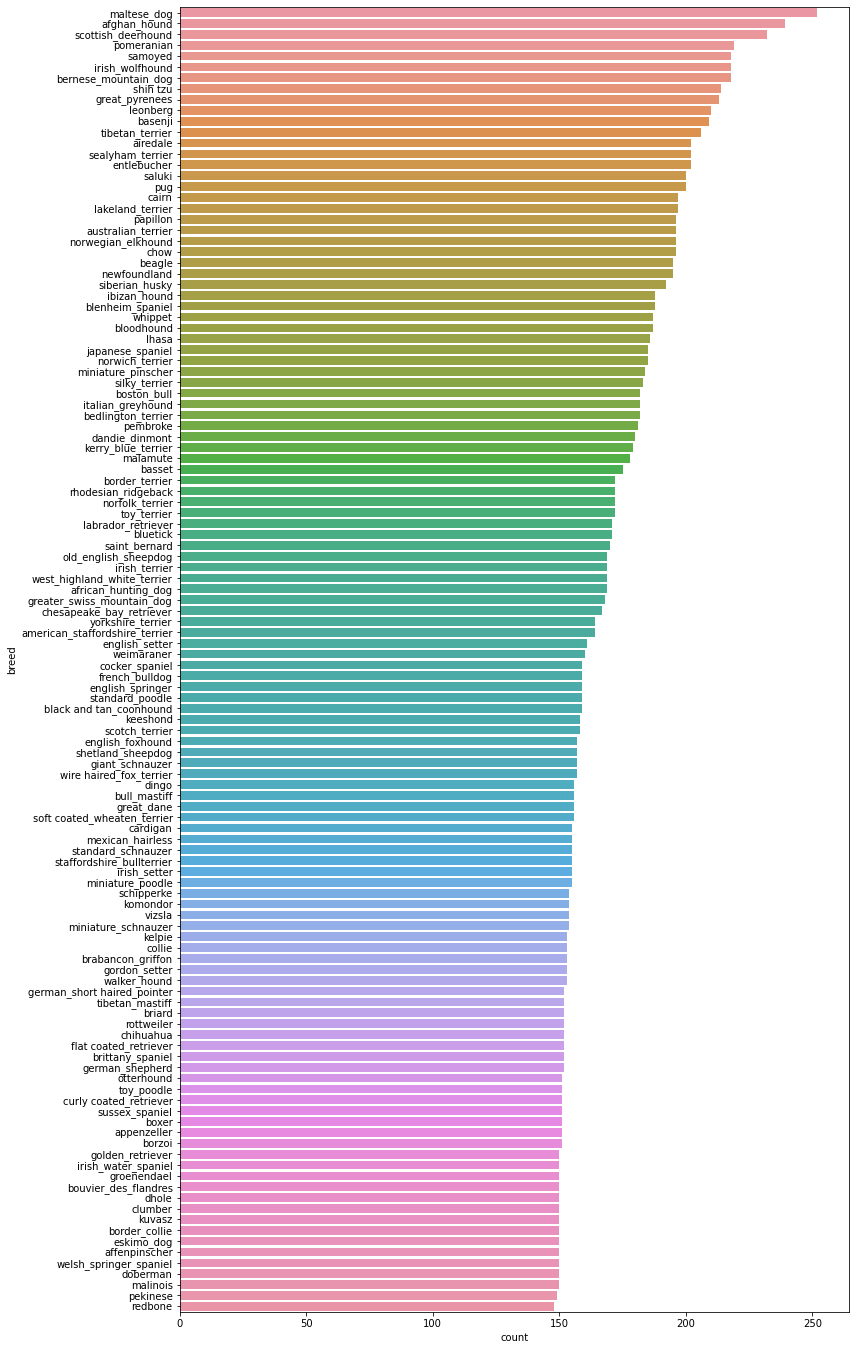

In [23]:
plt.figure(figsize=(12,24), facecolor='white')
sns.barplot(x="count", y="breed", data=labels)
plt.show()

In [13]:
df.label = df.label.apply(lambda x: ' '.join(get_dog_name(x).split('-')[1:]))
df.head(5)

,image,label,widths,heights
0,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",yorkshire_terrier,333,500
1,"[[[26, 25, 30], [25, 24, 29], [24, 23, 28], [2...",dhole,400,367
2,"[[[110, 131, 114], [107, 128, 109], [113, 130,...",giant_schnauzer,375,500
3,"[[[129, 139, 140], [129, 139, 140], [130, 140,...",leonberg,450,321
4,"[[[252, 252, 252], [253, 253, 253], [253, 253,...",toy_poodle,500,333


### Etude du format des images

Les architectures telles que VGG et ResNet recoivend des images de dimension 244,244,3. Lors de la mise aux dimensions de l'image, les images de taille supérieures sont compréssées et les images de taille inférieure sont étirées. L'étirage est plus problématique car il y a création d'information. Il est choisit d'augementer seulement 20% de la taille d'une image. Une image de taille inférieure à 180,180 est jugée trop petite et elle ne peux pas être utilisée car elle contient trop peu d'information.

In [14]:
df['widths'].describe()

count    20580.000000
mean       442.531876
std        142.792308
min         97.000000
25%        361.000000
50%        500.000000
75%        500.000000
max       3264.000000
Name: widths, dtype: float64

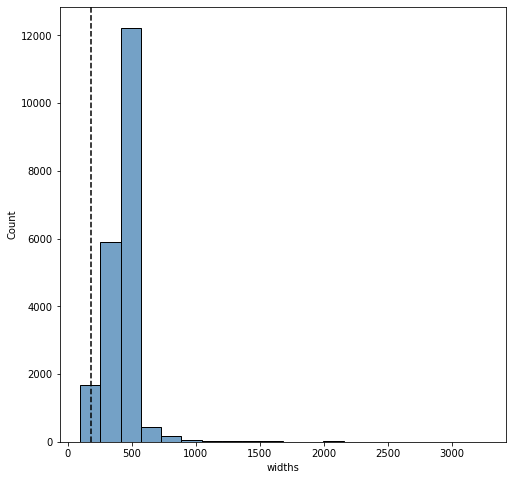

In [15]:
plt.figure(figsize=(8,8), facecolor='white')
sns.histplot(df['widths'], kde = False, color ='steelblue', bins = 20)
plt.axvline(x=180, c='k', linestyle='dashed')
plt.show()

In [16]:
df[df['widths']<180]

,image,label,widths,heights
18,"[[[133, 130, 113], [150, 149, 131], [184, 188,...",shetland_sheepdog,160,180
79,"[[[148, 104, 31], [148, 104, 29], [150, 104, 2...",dandie_dinmont,159,196
381,"[[[25, 25, 37], [22, 22, 34], [20, 19, 33], [3...",wire haired_fox_terrier,172,158
494,"[[[127, 120, 102], [116, 109, 93], [108, 99, 9...",standard_schnauzer,160,170
501,"[[[38, 51, 57], [39, 52, 58], [39, 53, 56], [4...",english_foxhound,120,150
...,...,...,...,...
8342,"[[[57, 70, 87], [45, 58, 75], [38, 51, 68], [9...",norwich_terrier,145,175
8484,"[[[207, 194, 92], [208, 195, 93], [211, 196, 9...",bouvier_des_flandres,178,200
8495,"[[[61, 51, 39], [30, 20, 8], [44, 30, 19], [49...",dandie_dinmont,165,230
8531,"[[[153, 137, 124], [154, 141, 132], [159, 153,...",irish_water_spaniel,170,170


278 images ont une largeur trop faible.

In [17]:
df['heights'].describe()

count    20580.000000
mean       385.861224
std        124.863446
min        100.000000
25%        333.000000
50%        375.000000
75%        453.000000
max       2562.000000
Name: heights, dtype: float64

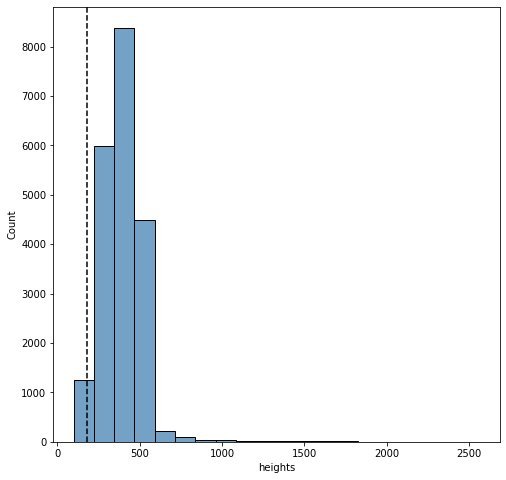

In [18]:
plt.figure(figsize=(8,8), facecolor='white')
sns.histplot(df['heights'], kde = False, color ='steelblue', bins = 20)
plt.axvline(x=180, c='k', linestyle='dashed')
plt.show()

Il est nécessaire de rescale les images en fonction du modèle à utiliser.

In [19]:
df[df['heights']<180]

,image,label,widths,heights
138,"[[[55, 88, 33], [59, 92, 37], [65, 98, 41], [7...",brittany_spaniel,182,140
143,"[[[10, 15, 9], [7, 6, 4], [27, 18, 19], [63, 5...",english_foxhound,337,150
244,"[[[115, 110, 106], [132, 127, 123], [148, 145,...",silky_terrier,189,167
278,"[[[22, 21, 26], [19, 18, 23], [15, 15, 17], [1...",sussex_spaniel,250,167
351,"[[[124, 139, 144], [125, 140, 145], [127, 142,...",german_short haired_pointer,200,170
...,...,...,...,...
8317,"[[[147, 142, 138], [183, 178, 174], [223, 218,...",australian_terrier,160,170
8342,"[[[57, 70, 87], [45, 58, 75], [38, 51, 68], [9...",norwich_terrier,145,175
8406,"[[[229, 235, 233], [233, 239, 237], [240, 246,...",sealyham_terrier,200,150
8520,"[[[35, 53, 37], [34, 52, 36], [33, 51, 35], [3...",cairn,250,156


Une grande majorité des images ont une largeur de 500px.
462 images ont une hauteur trop faible.

Les images de taille trop petites (< 180 x 180 px) seront supprimées

In [20]:
prev = df.shape[0]
df = df[df['heights']>=180]
df = df[df['widths']>=180]
df.drop(columns=['widths','heights'], inplace=True)

In [21]:
print(f'Il reste {df.shape[0]} images, {prev - df.shape[0]} n\' ont pas la bonne dimension.')

Il reste 19960 images, 620 n' ont pas la bonne dimension.
